# Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import pylab as p
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
from collections import Counter
import re

#importing packages for the prediction of time-series data
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.metrics import mean_squared_error

C:\Users\Ayushi Asthana\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Loading Data

In [2]:
temperature = pd.read_csv('C:\\Users\\Ayushi Asthana\\Documents\\MINOR 2\\berkley_earth.csv', parse_dates=['dt'])

In [3]:
temperature.head()

,dt,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
0,1850-01-01,0.749,8.242,-3.206,12.833
1,1850-02-01,3.071,9.970,-2.291,13.588
2,1850-03-01,4.954,10.347,-1.905,14.043
3,1850-04-01,7.217,12.934,1.018,14.667
4,1850-05-01,10.004,15.655,3.811,15.507


In [4]:
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 5 columns):
dt                                1992 non-null datetime64[ns]
LandAverageTemperature            1992 non-null float64
LandMaxTemperature                1992 non-null float64
LandMinTemperature                1992 non-null float64
LandAndOceanAverageTemperature    1992 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 77.9 KB


## Are we facing Global Warming ?  

In [5]:
year_avg_temp = temperature.groupby(temperature.dt.dt.year).mean()
year_avg_temp.LandAverageTemperature.plot(linewidth = 3)
plt.title('Average temperature by year')
plt.xlabel('year')

Text(0.5,0,'year')

# Parameters under consideration

In [6]:
dt_df                      = pd.DataFrame(data = temperature.iloc[:, 0].values, columns = ['Date'])
LandAverageTemperature_df  = pd.DataFrame(data = temperature.iloc[:, 1].values, columns = ['LandAverageTemperature'])
OceanAverageTemperature_df = pd.DataFrame(data = temperature.iloc[:, 4].values, columns = ['OceanAverageTemperature'])

## Preparing Time Series For Land Average Temperature

#### New Data with dataframes : Date, Land_Average_Temperature

In [7]:
data_land_avg_temp = pd.concat([dt_df, LandAverageTemperature_df], axis =1)
data_land_avg_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 2 columns):
Date                      1992 non-null datetime64[ns]
LandAverageTemperature    1992 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 31.2 KB


In [8]:
data_land_avg_temp.head()

,Date,LandAverageTemperature
0,1850-01-01,0.749
1,1850-02-01,3.071
2,1850-03-01,4.954
3,1850-04-01,7.217
4,1850-05-01,10.004


In [9]:
data_land_avg_temp.to_csv('C:\\Users\\Ayushi Asthana\\Documents\\MINOR 2\\data_land_avg_temp.csv')
data_land_avg_temp = pd.read_csv('C:\\Users\\Ayushi Asthana\\Documents\\MINOR 2\\data_land_avg_temp.csv', index_col='Date')

In [10]:
data_land_avg_temp = data_land_avg_temp.drop('Unnamed: 0', axis = 1)

In [11]:
data_land_avg_temp.head()

,LandAverageTemperature
Date,
1850-01-01,0.749
1850-02-01,3.071
1850-03-01,4.954
1850-04-01,7.217
1850-05-01,10.004


#### Time Series For LandAverageTemperature

In [12]:
data_land_avg_temp.index = pd.to_datetime(data_land_avg_temp.index)
print(data_land_avg_temp.head(3))
print("\n\n",data_land_avg_temp.tail(3))

            LandAverageTemperature
Date                              
1850-01-01                   0.749
1850-02-01                   3.071
1850-03-01                   4.954


             LandAverageTemperature
Date                              
2015-01-10                  10.801
2015-01-11                   7.433
2015-01-12                   5.518


#### Visualizing Time Series

In [13]:
data_land_avg_temp.plot()
plt.title("Time Series_Land_Avg_Temperature")
plt.xlabel("Date")
plt.ylabel("Land Avg Temperature")
plt.rcParams["figure.figsize"] = (20, 4)

### Magnifying view

In [14]:
a = data_land_avg_temp.head(72)

In [15]:
a.plot()
plt.title("FIRST 6 years")
plt.xlabel("Date")
plt.ylabel("Land Avg Temperature")
plt.rcParams["figure.figsize"] = (8, 4)

In [16]:
b = data_land_avg_temp.tail(72)

In [17]:
b.plot()
plt.title("Last 6 years")## Preparing Time Series For Land Average Temperature
plt.xlabel("Date")
plt.ylabel("Land Avg Temperature")
plt.rcParams["figure.figsize"] = (8, 4)

## Preparing Time Series For Ocean Average Temperature

## New Data with dataframes : Date, Ocean_Average_Temperature

In [18]:
data_ocean_avg_temp = pd.concat([dt_df, OceanAverageTemperature_df], axis =1)
data_ocean_avg_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 2 columns):
Date                       1992 non-null datetime64[ns]
OceanAverageTemperature    1992 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 31.2 KB


In [19]:
data_ocean_avg_temp.head()

,Date,OceanAverageTemperature
0,1850-01-01,12.833
1,1850-02-01,13.588
2,1850-03-01,14.043
3,1850-04-01,14.667
4,1850-05-01,15.507


In [20]:
data_ocean_avg_temp.to_csv('C:\\Users\\Ayushi Asthana\\Documents\\MINOR 2\\data_ocean_avg_temp.csv')
data_ocean_avg_temp = pd.read_csv('C:\\Users\\Ayushi Asthana\\Documents\\MINOR 2\\data_ocean_avg_temp.csv', index_col='Date')

In [21]:
data_ocean_avg_temp = data_ocean_avg_temp.drop('Unnamed: 0', axis = 1)
data_ocean_avg_temp.head()

,OceanAverageTemperature
Date,
1850-01-01,12.833
1850-02-01,13.588
1850-03-01,14.043
1850-04-01,14.667
1850-05-01,15.507


#### Time Series For LandAverageTemperature

In [22]:
data_ocean_avg_temp.index = pd.to_datetime(data_ocean_avg_temp.index)
print(data_ocean_avg_temp.head(3))
print("\n\n",data_ocean_avg_temp.tail(3))

            OceanAverageTemperature
Date                               
1850-01-01                   12.833
1850-02-01                   13.588
1850-03-01                   14.043


             OceanAverageTemperature
Date                               
2015-01-10                   16.290
2015-01-11                   15.252
2015-01-12                   14.774


#### Visualizing Time Series

In [23]:
data_ocean_avg_temp.plot()
plt.title("Time Series_Ocean_Avg_Temperature")
plt.xlabel("Date")
plt.ylabel("Ocean Avg Temperature")
plt.rcParams["figure.figsize"] = (20, 4)

### Magnifying view

In [24]:
c = data_ocean_avg_temp.head(72)

In [25]:
c.plot()
plt.title("FIRST 6 years")
plt.xlabel("Date")
plt.ylabel("Ocean Avg Temperature")
plt.rcParams["figure.figsize"] = (8, 4)

In [26]:
d = data_ocean_avg_temp.tail(72)

In [27]:
d.plot()
plt.title("LAST 6 years")
plt.xlabel("Date")
plt.ylabel("Ocean Avg Temperature")
plt.rcParams["figure.figsize"] = (8, 4)

# Optimisation of Forecasting Results

### Performing Rolling Mean Statistics

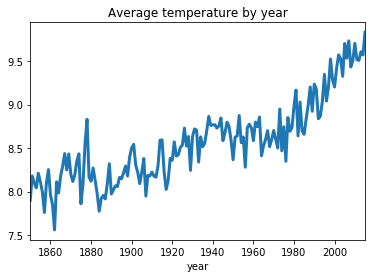

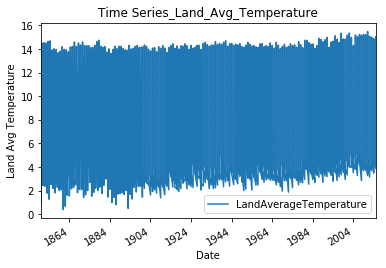

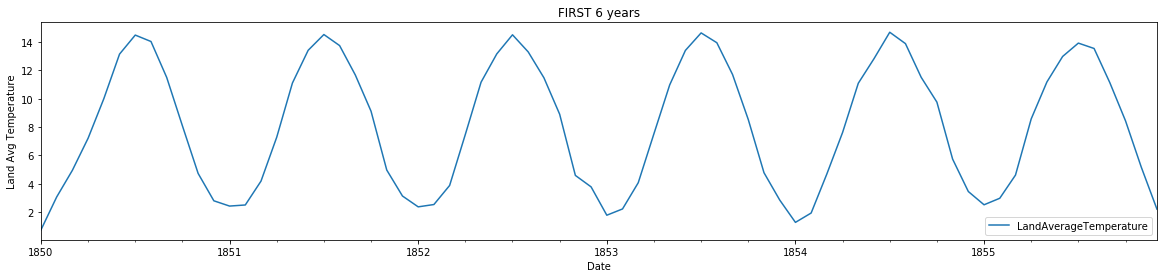

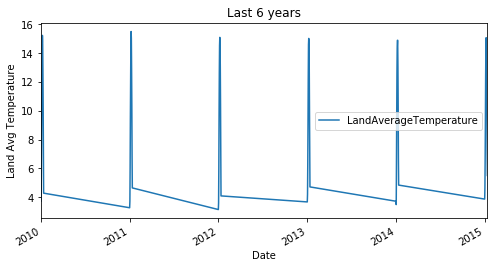

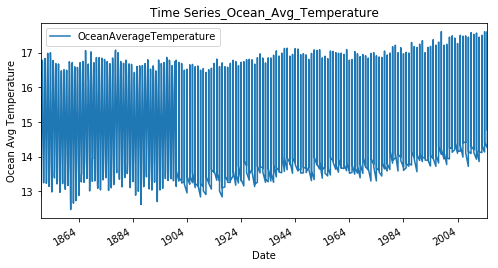

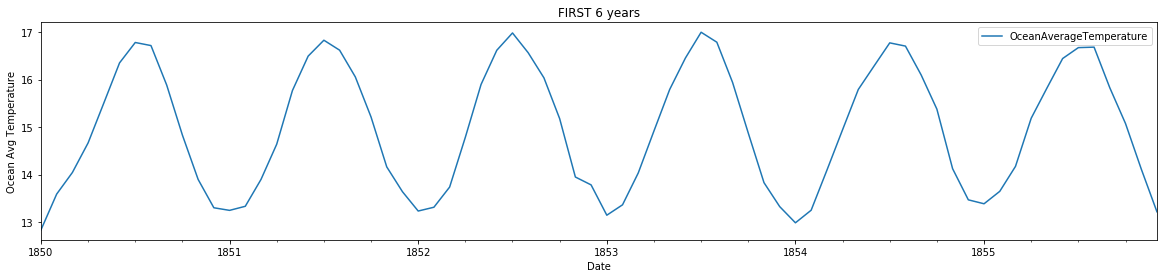

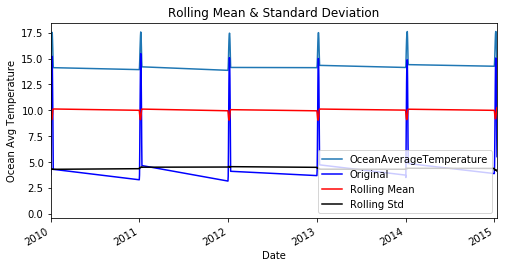

ADF Stastistic : -1.455328
p-value        : 0.555483
Lags Used      : 26.000000

The graph is NON STATIONERY

Critical values:
	1%     : -3.434 
	5%     : -2.863 
	10%     : -2.568 


In [28]:
def test_stationarity(x):

                                 # Determing rolling statistics
    mean = x.rolling(window=22).mean()
    std  = x.rolling(window=12).std()
    
    #Plot rolling statistics:
    orig = plot.plot(x,       color = 'blue',  label = 'Original')
    mean = plot.plot(mean, color = 'red',   label = 'Rolling Mean')
    std  = plot.plot(std,  color = 'black', label = 'Rolling Std')
    
    plot.legend(loc='best')
    plot.title('Rolling Mean & Standard Deviation')
    plot.show(block=False)
    plt.rcParams["figure.figsize"] = (20, 4)
    
                                # Perform Dickey Fuller test    
    result = adfuller(x)
    print('ADF Stastistic : %f'%result[0])
    print('p-value        : %f'%result[1])
    print('Lags Used      : %f'%result[2])
    pvalue = result[1]
    
    for key,value in result[4].items():
         if result[0]>value:
            print("\nThe graph is NON STATIONERY\n")
            break
         else:
            print("\nThe graph is STATIONERY\n")
            break
            
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s     : %.3f ' % (key, value))
        
ts = data_land_avg_temp['LandAverageTemperature']      
test_stationarity(ts)


## Making time series stationary

### Taking Log Transformation

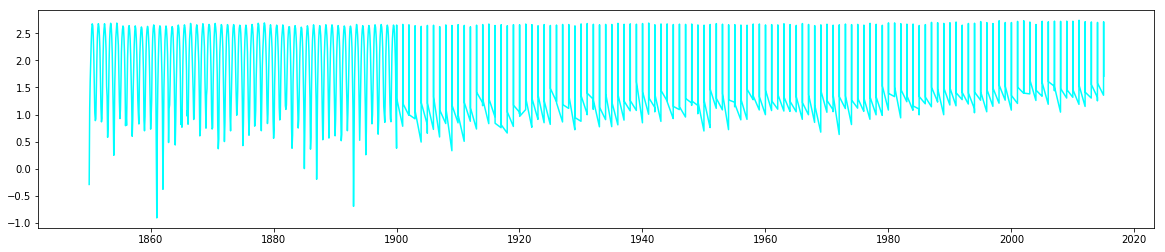

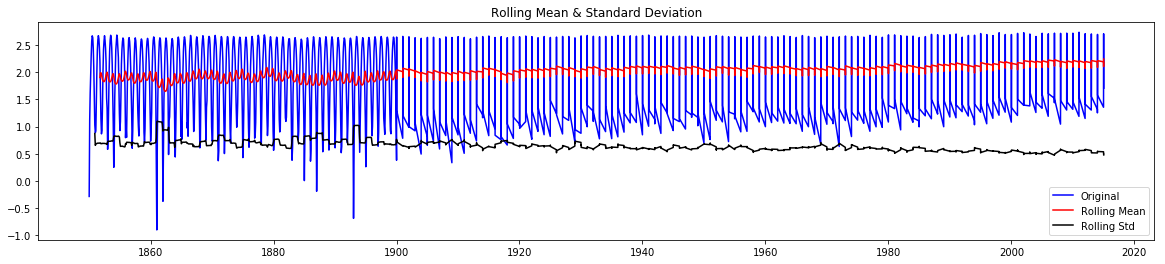

ADF Stastistic : -2.287946
p-value        : 0.175885
Lags Used      : 26.000000

The graph is NON STATIONERY

Critical values:
	1%     : -3.434 
	5%     : -2.863 
	10%     : -2.568 


In [29]:
ts_log = np.log(ts)
plot.plot(ts_log, color="cyan")
plot.show()
plt.rcParams["figure.figsize"] = (20, 4)

test_stationarity(ts_log)

### 1) Average Removal

In [30]:
avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(avg, color='red')
plt.rcParams["figure.figsize"] = (20, 4)

C:\Users\Ayushi Asthana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


In [31]:
avg_diff = ts_log - avg
avg_diff.head(12)

Date
1850-01-01        NaN
1850-02-01        NaN
1850-03-01        NaN
1850-04-01        NaN
1850-05-01        NaN
1850-06-01        NaN
1850-07-01        NaN
1850-08-01        NaN
1850-09-01        NaN
1850-10-01        NaN
1850-11-01        NaN
1850-12-01   -0.77958
Name: LandAverageTemperature, dtype: float64

In [32]:
avg_diff.dropna(inplace=True)

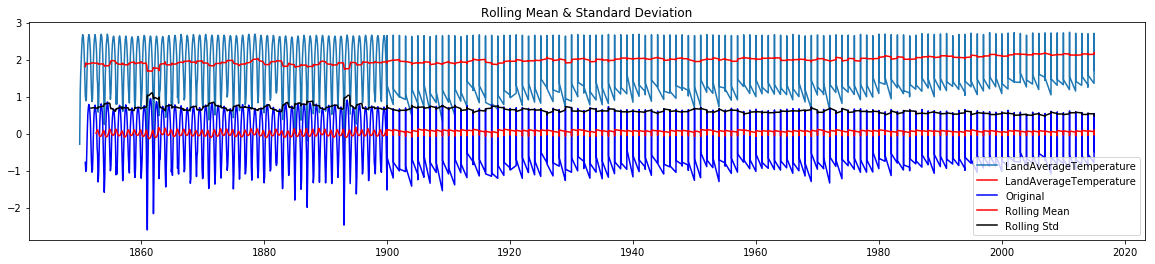

ADF Stastistic : -11.710383
p-value        : 0.000000
Lags Used      : 26.000000

The graph is STATIONERY

Critical values:
	1%     : -3.434 
	5%     : -2.863 
	10%     : -2.568 


In [33]:
test_stationarity(avg_diff)

### 2) Exponentially Weighted Average 

In [34]:
exp_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(exp_avg, color='red')
plt.rcParams["figure.figsize"] = (20, 4)

C:\Users\Ayushi Asthana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


In [35]:
exp_diff = ts_log - exp_avg

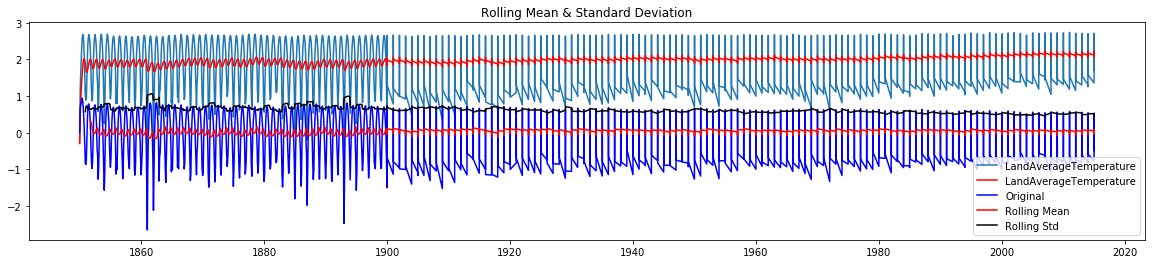

ADF Stastistic : -9.314342
p-value        : 0.000000
Lags Used      : 26.000000

The graph is STATIONERY

Critical values:
	1%     : -3.434 
	5%     : -2.863 
	10%     : -2.568 


In [36]:
test_stationarity(exp_diff)

## 3) Decomposition

In [37]:
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

ValueError: You must specify a freq or x must be a pandas object with a timeseries index witha freq not set to None

In [ ]:
#    Obeserved

plot.title('Obeserved = Trend + Seasonality + Residuals')
plot.plot(ts_log,label='Observed')
plot.legend(loc='best')
plt.rcParams["figure.figsize"] = (20, 4)

In [ ]:
#    TREND    

plot.plot(trend, label='Trend')
plot.legend(loc='best')
plt.title("TREND")
plt.rcParams["figure.figsize"] = (20, 4)

In [ ]:
#    SEASONALITY
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.title("SEASONALITY")
plt.rcParams["figure.figsize"] = (20, 4)

In [ ]:
#    RESIDUAL

plot.plot(residual, label='Residuals')
plot.legend(loc='best')
plot.title("RESIDUAL")
plt.rcParams["figure.figsize"] = (20, 4)

In [ ]:
ts_decompose = residual
ts_decompose.dropna(inplace=True)

In [ ]:
test_stationarity(ts_decompose)

## 4) Differencing

In [ ]:
ts_diff = ts_log - ts_log.shift()
plt.plot(ts_diff)

In [ ]:
ts_diff.dropna(inplace=True)
test_stationarity(ts_diff)

# FORECAST 1)     MOVING AVERAGE

### q : ACF

In [ ]:
ts_acf = acf(ts_diff, nlags=10)
plot.plot(ts_acf)
plot.axhline(y = 0.6,linestyle='--',color='g')
plot.axhline(y = 0.4,linestyle='--',color='g')
plot.axhline(y = 0.2,linestyle='--',color='g')
plot.axhline(y = 0,  linestyle='--',color='g')
plot.axhline(y = -0.6,linestyle='--',color='g')
plot.axhline(y = -0.4,linestyle='--',color='g')
plot.axhline(y = -0.2,linestyle='--',color='g')
plot.title('Autocorrelation Function')
plot.show()

plt.rcParams["figure.figsize"] = (20, 4)

### Applying Model

In [ ]:
# Splitting Train-Test Split
size = int(len(ts_diff)- 98)
train_ma, test_ma = ts_diff[0:size], ts_diff[size:len(ts_diff)]

In [ ]:
# follow Error

history_ma = [y for y in train_ma]
forecast_ma = list()
originals_ma = list()
error_list_ma = list()

i = 2007

for t in range(len(test_ma)):
    model_ma = ARIMA(history_ma, order=(0, 1, 1))
    model_fit_ma = model_ma.fit(disp=-1)
    
    output_ma = model_fit_ma.forecast()
    
    forecast_value_ma = output_ma[0]
    
        
    original_value_ma = test_ma[t]
    history_ma.append(original_value_ma)
    
    forecast_value_ma = np.exp(forecast_value_ma)
    
    
    original_value_ma = np.exp(original_value_ma)
    
    
    error_ma = ((abs(forecast_value_ma - original_value_ma)) / original_value_ma) * 100
    error_list_ma.append(error_ma)
    
    
    if t%12 ==0:
        print("Year = ", i, "DEC")    
        i = i + 1
        print('Forecasted = %f,   Expected = %f,   Error = %f ' % (forecast_value_ma, original_value_ma, error_ma), '%')
            
    forecast_ma.append(float(forecast_value_ma))
    originals_ma.append(float(original_value_ma))
    
print('\n Means Error in Forecasted Temperature : %f ' % (sum(error_list_ma)/float(len(error_list_ma))), '%')

### Visualising Results of MA

In [ ]:
plot.figure(figsize=(8, 6))
test_day_ma = [t
           for t in range(len(test_ma))]
label1 = 'Orginal'
label2 = 'Forecasted'
plot.plot(test_day_ma, forecast_ma, color= 'green', label = label1)
plot.plot(test_day_ma, originals_ma, color = 'orange', label = label2)
plot.title('Expected Vs Forecasted Views')
plot.ylabel('Global Average Temperature')
plot.legend(loc = 'upper left', bbox_to_anchor = (1.2, 1))
plot.show()

In [ ]:

plot.figure(figsize=(28, 8))
   
test_day_ma = [t1 + (len(train_ma))
               for t1 in range(len(test_ma))]

b_ma = np.exp(ts_diff)
day_ma = [t2
          for t2 in range(len(ts_diff))]

label1 = 'Orginal'
label2 = 'Forecasted'
plot.plot(test_day_ma, forecast_ma, color= 'green', label = label1)
plot.plot(day_ma, b_ma, color = 'orange', label = label2)
plot.title('Expected Vs Forecasted Views')
plot.ylabel('Average Land Temperature')
plot.legend(loc = 'upper left', bbox_to_anchor = (1.2, 1))
plot.show()
plt.rcParams["figure.figsize"] = (20, 4)

# FORECAST 2)     AUTO-REGRESSIVE(AR)

In [ ]:
ts_pacf = pacf(ts_diff, nlags=10, method='ols')
plot.plot(ts_pacf)
plot.axhline(y = 0.6,linestyle='--',color='g')
plot.axhline(y = 0.4,linestyle='--',color='g')
plot.axhline(y = 0.2,linestyle='--',color='g')
plot.axhline(y = 0,  linestyle='--',color='g')
plot.axhline(y = -0.6,linestyle='--',color='g')
plot.axhline(y = -0.4,linestyle='--',color='g')
plot.axhline(y = -0.2,linestyle='--',color='g')
plot.title('Partial Autocorrelation Function')
plot.show()
plt.rcParams["figure.figsize"] = (20, 4)

In [ ]:
# Splitting Train-Test Split
size = int(len(ts_diff)- 98)
train_ar, test_ar = ts_diff[0:size], ts_diff[size:len(ts_diff)]

In [ ]:
len(train_ar)

In [ ]:
# follow lag

history_ar = [x for x in train_ar]
forecast_ar = list()
originals_ar = list()
error_list_ar = list()

i = 2007

for t in range(len(test_ar)):
    model_ar = ARIMA(history_ar, order=(1, 1, 0))
    model_fit_ar = model_ar.fit(disp=-1)
    
    output_ar = model_fit_ar.forecast()
    
    forecast_value_ar = output_ar[0]
    
        
    original_value_ar = test_ar[t]
    history_ar.append(original_value_ar)
    
    forecast_value_ar = np.exp(forecast_value_ar)
    
    
    original_value_ar = np.exp(original_value_ar)
    
    
    error_ar = ((abs(forecast_value_ar - original_value_ar)) / original_value_ar) * 100
    error_list_ar.append(error_ar)
    
    
    if t%12 ==0:
        print("Year = ", i, "DEC")    
        i = i + 1
        print('Forecasted = %f,   Expected = %f,   Error = %f ' % (forecast_value_ar, original_value_ar, error_ar), '%')
            
    forecast_ar.append(float(forecast_value_ar))
    originals_ar.append(float(original_value_ar))
    
print('\n Means Error in Forecasted Temperature : %f ' % (sum(error_list_ar)/float(len(error_list_ar))), '%')

### Visulaising Results of AR

In [ ]:
plot.figure(figsize=(8, 6))
test_day_ar = [t
           for t in range(len(test_ar))]
label1 = 'Orginal'
label2 = 'Forecasted'
plot.plot(test_day_ar, forecast_ar, color= 'green', label = label1)
plot.plot(test_day_ar, originals_ar, color = 'orange', label = label2)
plot.title('Expected Vs Forecasted')
plot.ylabel('Global LAnd Average Temperature')
plot.legend(loc = 'upper left', bbox_to_anchor = (1.2, 1))
plot.show()
plt.rcParams["figure.figsize"] = (20, 4)

In [ ]:

plot.figure(figsize=(28, 8))
   
test_day_ar = [t1 + (len(train_ar))
               for t1 in range(len(test_ar))]

b = np.exp(ts_diff)
day_ar = [t2
          for t2 in range(len(ts_diff))]

label1 = 'Orginal'
label2 = 'Forecasting'
plot.plot(test_day_ar, forecast_ar, color= 'green', label = label1)
plot.plot(day_ar, b, color = 'orange', label = label2)
plot.title('Expected Vs Forecasting')
plot.ylabel('Global Land Average Temperature')
plot.legend(loc = 'upper left', bbox_to_anchor = (1.2, 1))
plot.show()
plt.rcParams["figure.figsize"] = (20, 4)